In [101]:
import numpy as np
import matplotlib.pyplot as plt

In [102]:
# Define the drift and diffusion functions
def mu(X,t):
    return 0.1*X 
def sigma(X,t):
    return 0.3*X
#Initial condition
X0 = 1.0
#Discretize time
T = 1.0
N = 1000
dt = T/N
t = np.linspace(0,T,N+1)

In [103]:
def first_derivative(f , x , t , bump = 10**(-5)):
    deriv = (f(x+bump,t ) - f(x-bump,t))/(2 * bump)
    return deriv


In [104]:
#Initalize solutions array
X=np.zeros(N+1)
X[0]=X0

In [105]:
#Implement Milstein scheme
for i in range(1,N+1):
    dW=np.sqrt(dt)*np.random.normal()
    X[i]=X[i-1]+ mu(X[i-1],t[i-1]) * dt + sigma(X[i-1],t[i-1]) * dW + 1/2 * sigma(X[i-1],t[i-1])*first_derivative(sigma,X[i-1],t[i-1]) * (dW**2 - dt)

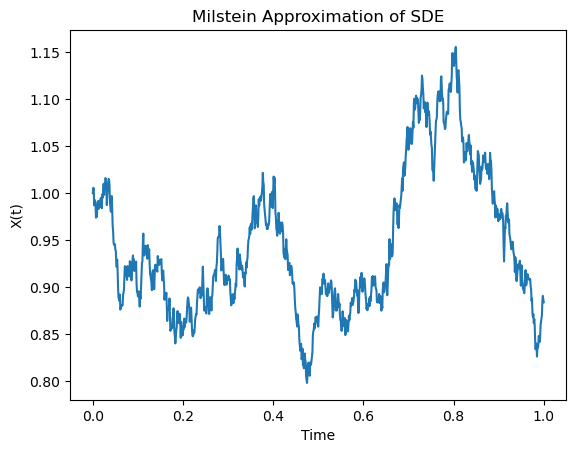

In [106]:
#Plot the results
plt.plot(t,X)
plt.xlabel('Time')
plt.ylabel('X(t)')
plt.title('Milstein Approximation of SDE')
plt.show()